Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mr-huaize (ecosensingai). Use `wandb login --relogin` to force relogin


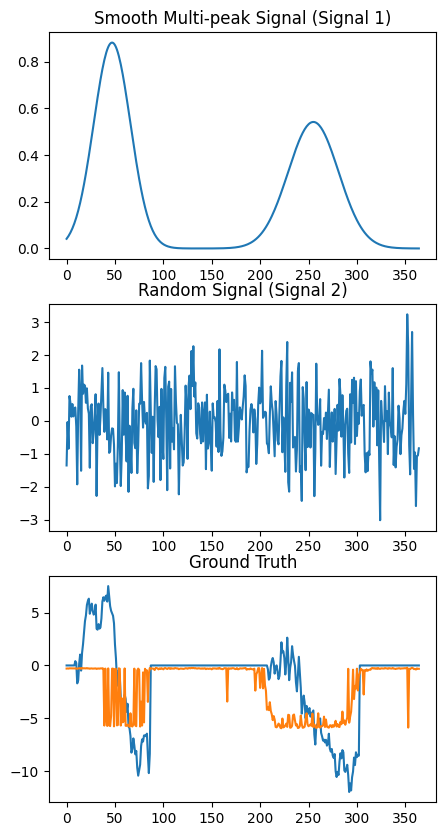

In [39]:
# 可视化结果
plt.figure(figsize=(5, 10))
#获取随机整数n
n = np.random.randint(0, batch_size)
plt.subplot(3, 1, 1)
plt.title("Smooth Multi-peak Signal (Signal 1)")
plt.plot(test_signal1[n, :, 0].numpy())

plt.subplot(3, 1, 2)
plt.title("Random Signal (Signal 2)")
plt.plot(test_signal2[n, :, 0].numpy())

plt.subplot(3, 1, 3)
plt.title("Ground Truth")
plt.plot(test_ground_truth[n, :, 0].numpy())

plt.plot(model_output[n, :, 0].cpu().numpy().transpose())
plt.show()

In [2]:
import torch
test_data = torch.load('toy_data/test_data.pth')

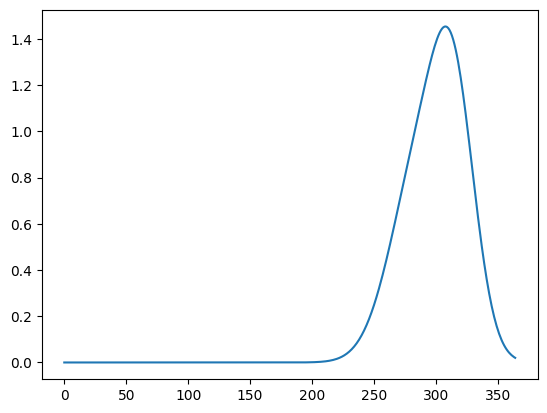

In [11]:
import matplotlib.pyplot as plt
plt.plot(test_data[0][0][:,0])

Epoch 1/10, Train Loss: 40.4683, Val Loss: 39.8310
Epoch 2/10, Train Loss: 35.7642, Val Loss: 34.9097
Epoch 3/10, Train Loss: 32.4016, Val Loss: 31.6101
Epoch 4/10, Train Loss: 29.4224, Val Loss: 29.2525
Epoch 5/10, Train Loss: 26.6772, Val Loss: 27.5178
Epoch 6/10, Train Loss: 24.5187, Val Loss: 24.2888
Epoch 7/10, Train Loss: 22.9945, Val Loss: 23.0791
Epoch 8/10, Train Loss: 22.1936, Val Loss: 24.9806
Epoch 9/10, Train Loss: 21.7454, Val Loss: 25.4949
Epoch 10/10, Train Loss: 21.0356, Val Loss: 20.0905


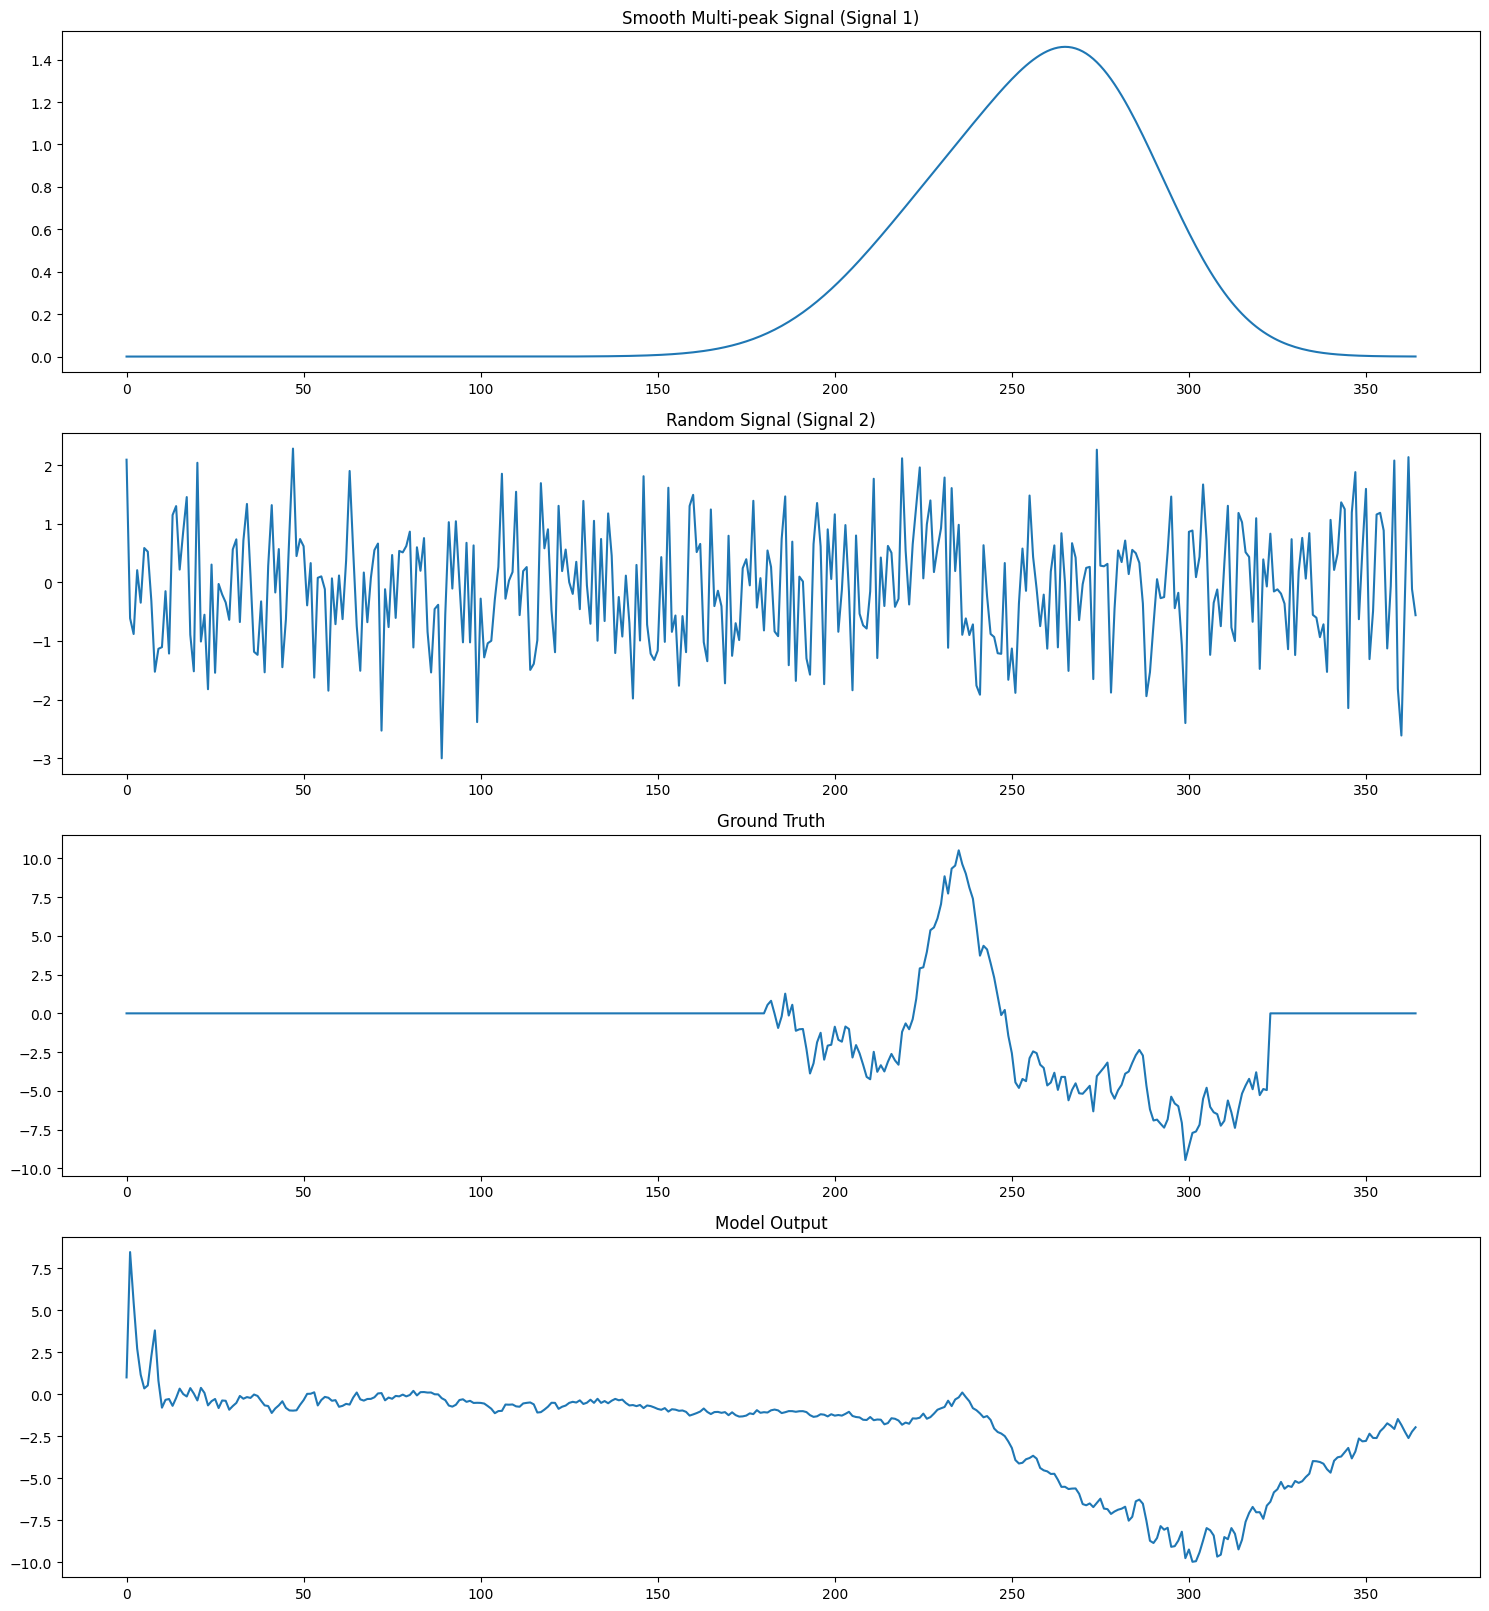

In [13]:
from transformer import *
n = 365

# load the data
train_data = torch.load('toy_data/train_data.pth')
val_data = torch.load('toy_data/val_data.pth')

train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
val_loader = DataLoader(val_data, batch_size=256)

# 模型定义
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
d_model = 4
nhead = 1

model = EncoderDecoderModel(input_dim=4, d_model=d_model, nhead=nhead, num_encoder_layers=1, dim_feedforward=4, max_seq_len=1000, num_decoder_layers=1)
model.to(device)

# wandb 配置

learning_rate = 0.005
epochs = 10
batch_size = 256

# 优化器和损失函数
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练函数
def train_model(model, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        

        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")
    
    return model

# 开始训练
trained_model = train_model(model, train_loader, val_loader, num_epochs=epochs)

# 保存模型
# torch.save(trained_model.state_dict(), "trained_model.pth")


test_data = torch.load('toy_data/test_data.pth')
# 测试模型
test_input, test_ground_truth = test_data.tensors

with torch.no_grad():
    model_output = trained_model(test_input.to(device))

# 可视化结果
plt.figure(figsize=(15, 20))

plt.subplot(5, 1, 1)
plt.title("Smooth Multi-peak Signal (Signal 1)")
plt.plot(test_input[5, :, 0].cpu().numpy())

plt.subplot(5, 1, 2)
plt.title("Random Signal (Signal 2)")
plt.plot(test_input[5, :, 2].cpu().numpy())

plt.subplot(5, 1, 3)
plt.title("Ground Truth")
plt.plot(test_ground_truth[5, :, 0].cpu().numpy())

plt.subplot(5, 1, 4)
plt.title("Model Output")
plt.plot(model_output[5, :, 0].cpu().numpy())

plt.tight_layout()